In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
file_path = "/content/drive/MyDrive/Smith MMAI/MMAI 831/"
file_name ="emc.csv"

In [3]:
df = pd.read_csv(file_path + file_name)

In [4]:
df

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar
...,...,...,...,...,...
62136,M64379,8381435,15670260,16-11-2013 00:43,Organic F&V
62137,M64379,8381435,15668597,16-11-2013 00:43,Exotic Vegetables
62138,M64379,8381435,7570555,16-11-2013 00:43,Shoe Polish
62139,M64379,8381435,7587490,16-11-2013 00:43,Organic Dals & Pulses


In [5]:
df.shape
df.info()
df.describe().T
df.head(n=20)
df.tail()

(62141, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62141 entries, 0 to 62140
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Member       62141 non-null  object
 1   Order        62141 non-null  int64 
 2   SKU          62141 non-null  int64 
 3   Created On   62141 non-null  object
 4   Description  62141 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


,count,mean,std,min,25%,50%,75%,max
Order,62141.0,7.642313e+06,5.131117e+05,6422558.0,7457967.0,7725501.0,8006749.0,8388492.0
SKU,62141.0,1.774323e+07,1.442477e+07,6884195.0,15668381.0,15668520.0,15669867.0,93319504.0


,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar
5,M09736,6468572,15668478,22-09-2014 22:45,Banana
6,M09736,6468572,21409124,22-09-2014 22:45,Sugar Cubes
7,M09736,6468572,34938526,22-09-2014 22:45,Other Sweets
8,M09736,6468572,15669778,22-09-2014 22:45,Other Dals
9,M09736,6468572,34989440,22-09-2014 22:45,Other Rice Products


,Member,Order,SKU,Created On,Description
62136,M64379,8381435,15670260,16-11-2013 00:43,Organic F&V
62137,M64379,8381435,15668597,16-11-2013 00:43,Exotic Vegetables
62138,M64379,8381435,7570555,16-11-2013 00:43,Shoe Polish
62139,M64379,8381435,7587490,16-11-2013 00:43,Organic Dals & Pulses
62140,M64379,8381435,15669830,16-11-2013 00:43,Other Rice Products


In [6]:
df['Created On'] = pd.to_datetime(df['Created On']).dt.date


In [7]:
#group by member 
my_mode = lambda x:pd.Series.mode(x)[0]
member =df.groupby('Member').agg(
    {
        'Order':[pd.Series.nunique, my_mode],
        'SKU' : [pd.Series.nunique, 'count'],
        'Created On':['count', my_mode, 'min', 'max'],
    }).reset_index()

member.columns = ["_".join(x) for x in member.columns.ravel()]
member = member.rename(columns={'Member': "Member"})
member.columns = member.columns.str.replace("<lambda_0>", "mode")
member.columns = member.columns.str.replace("<lambda>", "mode")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  # Remove the CWD from sys.path while we load stuff.


In [8]:
member

,Member_,Order_nunique,Order_mode,SKU_nunique,SKU_count,Created On_count,Created On_mode,Created On_min,Created On_max
0,M04158,132,7705240,157,493,493,2013-01-18,2012-04-12,2014-12-04
1,M08075,55,8233798,168,638,638,2014-01-16,2012-12-14,2014-12-02
2,M09303,105,7973480,149,463,463,2014-08-05,2013-01-09,2014-12-08
3,M09736,62,7931131,127,626,626,2014-05-17,2013-07-12,2014-12-04
4,M12050,39,7710902,146,556,556,2013-01-26,2012-12-29,2014-09-13
...,...,...,...,...,...,...,...,...,...
101,M90375,79,7947852,127,412,412,2013-05-12,2013-01-11,2014-12-08
102,M91098,66,7426935,141,483,483,2013-09-15,2013-01-11,2014-12-09
103,M96365,73,7340753,118,402,402,2013-11-10,2013-01-08,2014-12-06
104,M99030,78,7789232,41,594,594,2012-11-15,2012-06-12,2014-12-08


In [9]:
member_clean = member.drop(['Member_', 'Created On_mode', 'Created On_min', 'Created On_max', 'Order_mode', 'Created On_count'], axis=1)
member_pred =  member.drop(['Created On_mode', 'Created On_min', 'Created On_max', 'Order_mode', 'Created On_count'], axis=1)

In [10]:
display(member_clean)

,Order_nunique,SKU_nunique,SKU_count
0,132,157,493
1,55,168,638
2,105,149,463
3,62,127,626
4,39,146,556
...,...,...,...
101,79,127,412
102,66,141,483
103,73,118,402
104,78,41,594


In [11]:
from sklearn.preprocessing import StandardScaler
import scipy.cluster
scaler = StandardScaler()
member_s = scaler.fit_transform(member_clean)

In [12]:
aggl = scipy.cluster.hierarchy.linkage(member_clean, method='ward', metric='euclidean')

In [13]:
# Create clusters
# from scipy.cluster.hierarchy import fcluster

# distance_threshold = 160
# clusters = fcluster(Z, distance_threshold, criterion='distance')
# X_train_hierClustered = \
#     pd.DataFrame(data=clusters,index=X_train_PCA.index,columns=['cluster'])

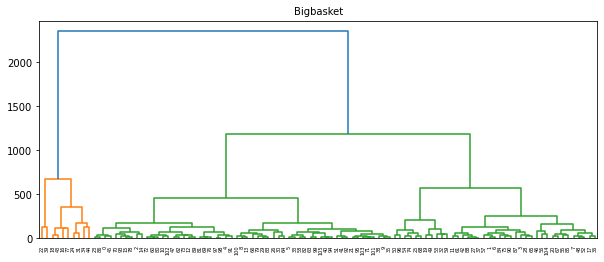

In [14]:
plt.figure(figsize=(10, 4));
plt.grid(False)
plt.title("Bigbasket", size=10);  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [15]:
#select 3 clusters
K=3
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [16]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, member_s.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = member_s[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(scaler.inverse_transform(means[i,:].reshape(1,-1)))


Cluster 1 (n=10):
[[ 133.2  187.  1082.3]]

Cluster 2 (n=57):
[[ 68.18 137.4  464.37]]

Cluster 3 (n=39):
[[ 81.26 148.28 637.15]]


In [17]:
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

col_names = member_clean.columns

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    min = d.minmax[0].reshape(1,-1)
    mean = d.mean.reshape(1, -1)
    max = d.minmax[0].reshape(1,-1)
    tmp_df.loc[0] = scaler.inverse_transform(min).flatten()
    tmp_df.loc[1] = scaler.inverse_transform(mean).flatten()
    tmp_df.loc[2] = scaler.inverse_transform(max).flatten()
    tmp_df.index = ['Min', 'Mean', 'Max'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(member_s.shape[0]))
d = stats.describe(member_s, axis=0)
display(stats_to_df(d, scaler))

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.2f' % x):
  for i, label in enumerate(set(labels)):
      d = stats.describe(member_s[labels==label], axis=0)
      print('\nCluster {}:'.format(label))
      print('Number of Instances: {}'.format(d.nobs))
      display(stats_to_df(d, scaler))

All Data:
Number of Instances: 106


,Min,Mean,Max
Order_nunique,24.00,79.12,24.00
SKU_nunique,41.00,146.08,41.00
SKU_count,402.00,586.24,402.00



Cluster 1:
Number of Instances: 10


,Min,Mean,Max
Order_nunique,73.00,133.20,73.00
SKU_nunique,122.00,187.00,122.00
SKU_count,874.00,1082.30,874.00



Cluster 2:
Number of Instances: 57


,Min,Mean,Max
Order_nunique,24.00,68.18,24.00
SKU_nunique,79.00,137.40,79.00
SKU_count,402.00,464.37,402.00



Cluster 3:
Number of Instances: 39


,Min,Mean,Max
Order_nunique,25.00,81.26,25.00
SKU_nunique,41.00,148.28,41.00
SKU_count,532.00,637.15,532.00


In [18]:
df_class = pd.concat([member_pred, pd.DataFrame({'cluster':labels})], axis = 1)
df_class.head()

,Member_,Order_nunique,SKU_nunique,SKU_count,cluster
0,M04158,132,157,493,2
1,M08075,55,168,638,3
2,M09303,105,149,463,2
3,M09736,62,127,626,3
4,M12050,39,146,556,2


In [19]:
cust_vvip = df_class[df_class['cluster']==1]
cust_vip = df_class[df_class['cluster']==2]
cust_norm= df_class[df_class['cluster']==3]

In [20]:
import plotly.express as px
fig = px.scatter_3d(df_class, x = 'Order_nunique', y = 'SKU_nunique', z = 'SKU_count',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [21]:
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= member_clean 
    exemplar_idx = distance.cdist([means[i]], member_clean).argmin()
   
    print('\nCluster {}:'.format(label))
    #print("  Examplar ID: {}".format(exemplar_idx))
    #print("  Label: {}".format(labels[exemplar_idx]))
    #print("  Features:")
    display(df.iloc[[exemplar_idx]])


Cluster 1:


,Member,Order,SKU,Created On,Description
58,M09736,6562518,21409124,2014-08-26,Sugar Cubes



Cluster 2:


,Member,Order,SKU,Created On,Description
58,M09736,6562518,21409124,2014-08-26,Sugar Cubes



Cluster 3:


,Member,Order,SKU,Created On,Description
58,M09736,6562518,21409124,2014-08-26,Sugar Cubes


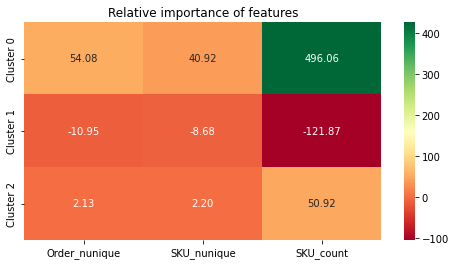

In [22]:
import seaborn as sns

all_means = member_clean.mean(axis=0)
means_inv = scaler.inverse_transform(means.reshape(3,-1))
allmeans = np.array(all_means)
relative_imp = means_inv - allmeans

plt.figure(figsize=(8, 4));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, 
            annot=relative_imp, 
            fmt='.2f', 
            cmap='RdYlGn', 
            robust=True, 
            square=False,
            xticklabels=col_names, 
            yticklabels=['Cluster {}'.format(x) for x in range(K)]);
# plt.savefig('out/heatmap.png')

In [25]:
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [31]:
X_df = pd.DataFrame(member_clean, columns=col_names)

,Order_nunique,SKU_nunique,SKU_count,Cluster
0,132,157,493,2
1,55,168,638,3
2,105,149,463,2
3,62,127,626,3
4,39,146,556,2


Text(0.5, 1.0, 'Snake Plot, Hierarchical, K=3')

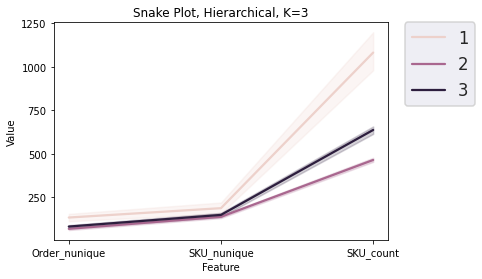

In [36]:
X_df = pd.DataFrame(member_clean, columns=col_names)
X_df['Cluster'] = labels
X_df.head()

X_df_melt = pd.melt(X_df,
    id_vars=['Cluster'],
    value_vars=['Order_nunique', 'SKU_nunique', 'SKU_count'],
    var_name='Feature',
    value_name='Value')

plt.title('Snake Plot, Hierarchical, K=3');
sns.set(style="darkgrid")
sns.set_context("talk")
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=X_df_melt, legend="full")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig('out/mall-5-snake.png', transparent=False);

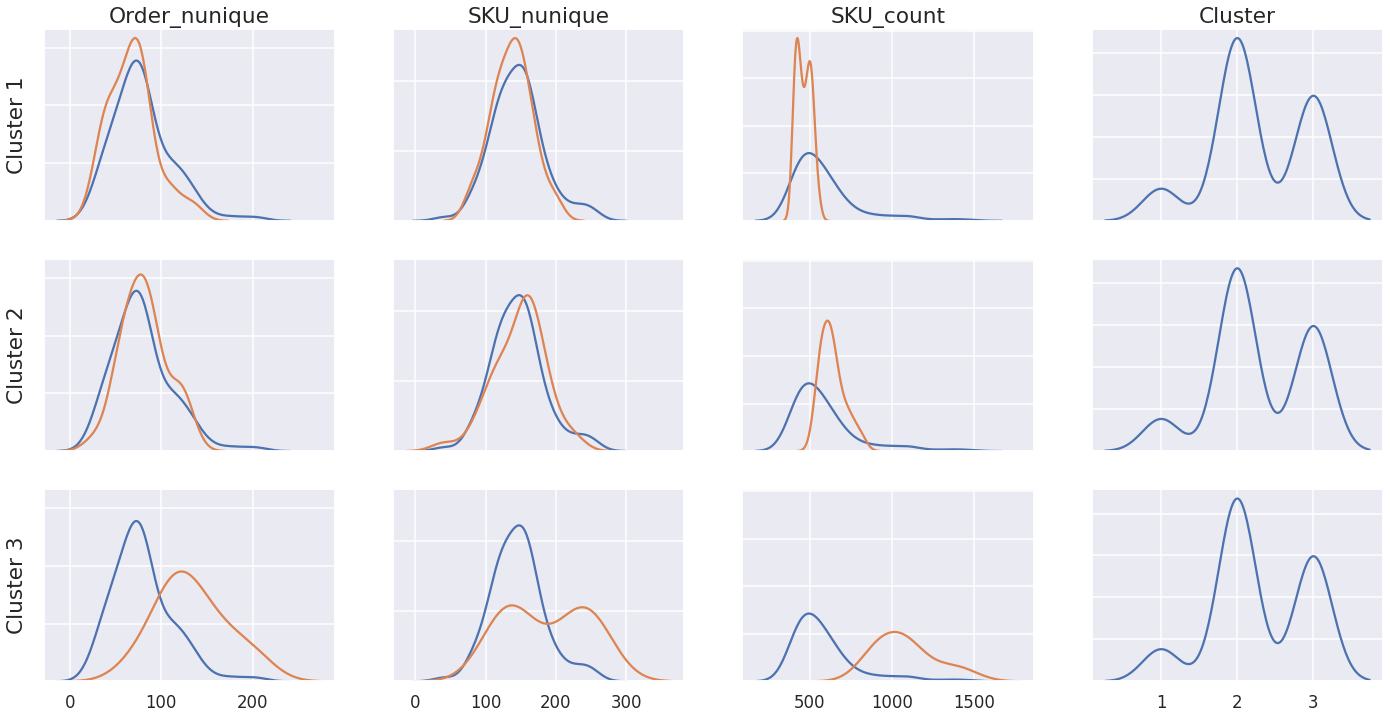

In [43]:
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
n_features = member_clean.shape[1]
cat_col_names = list(member_clean.select_dtypes(include=np.object).columns)
num_col_names = list(member_clean.select_dtypes(include=np.number).columns)
f, axes = plt.subplots(K, n_features, figsize=(24, 12), sharex='col', sharey='col')

cols = [x for x in num_col_names]
cols += [x for x in cat_col_names]
rows = ['Cluster {}'.format(i+1) for i in np.arange(K)]


for i, label in enumerate(set(labels)):
    n = member_clean.iloc[labels==label].shape[0]
  

    col_idx = 0
    for col in num_col_names:
        sns.distplot(member_clean[[col]], hist=False, rug=False, label="All", ax=axes[i-1, col_idx]);
        chart = sns.distplot(member_clean.iloc[labels==label][[col]], hist=False, rug=False, label="Cluster {}".format(label), ax=axes[i-1,col_idx]);
        chart.set_yticklabels([])
        col_idx=col_idx+1
    for col in cat_col_names:
        
        # Finding out the (normalized) distribution of each level for "all data"
        # Finding out the (normalized) distribution fo each level for this cluster
        # Plotting both on a bar chart
        
        all_prop_df = (member_clean[col].value_counts(normalize=True).reset_index())
        all_prop_df['Cluster']= 'All'

        prop_df = (member_clean.iloc[labels==label][col].value_counts(normalize=True).reset_index())
        prop_df['Cluster']= 'Cluster {}'.format(label)

        prop_df = pd.concat([all_prop_df, prop_df])
        prop_df = prop_df.reset_index(drop=True)

        chart = sns.barplot(x='index', y=col, hue='Cluster', data=prop_df, ci=None, ax=axes[i-1, col_idx])
        #chart.set_xticklabels(chart.get_xticklabels(), rotation=55)
        
        col_idx=col_idx+1

for ax1 in axes:
    for ax in ax1:
        # ax.get_legend().remove()
        ax.set_ylabel('')
        ax.set_xlabel('')
        
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large')

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')

for j in np.arange(n_features):
    ax = axes[K-1,j]
    if j >= len(num_col_names): #Tmp hack to avoid rotating numeric lablels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
plt.show();
    